## Customer Churn Prediction 

This notebook explores a machine learning approach to predict customer churn.
The primary focus of the overall project is **churn analysis and risk segmentation**.
This model is included as a supplementary exploration to demonstrate familiarity
with supervised learning techniques.


In [6]:
import pandas as pd
import numpy as np 

In [9]:
df = pd.read_csv( r"C:\Users\DELL\OneDrive\Desktop\anu course\datasets\chrun dataset.csv")
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [11]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [17]:
df=df.drop(['State'],axis=1)

In [134]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in ['International plan', 'Voice mail plan', 'Churn']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le




In [20]:
num_cols = [
    'Account length',
    'Number vmail messages',
    'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls']

cat_cols = [
     'Area code',
    'International plan',
    'Voice mail plan']


In [23]:
# Numerical
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical
for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1692\2102700758.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1692\2102700758.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [25]:
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
International plan,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489
Voice mail plan,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291
Number vmail messages,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539


## Why Use a Machine Learning Model?

After identifying churn drivers through SQL and Power BI analysis,
a machine learning model is used here to explore whether churn
can be predicted using customer usage and service interaction features.

This model is **not** used as the primary decision system,
but as a supporting analytical experiment.


In [28]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay



In [48]:
print("df shape:", df.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)



df shape: (2666, 19)
X shape: (2666, 18)
y shape: (2666,)


In [50]:
print(y.isnull().sum())       
print(y.unique())             


0
[0 1]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [54]:
numerical_cols= X_train.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test,lr_pred))
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(acc *100,2),"%")

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       751
           1       0.61      0.22      0.32       129

    accuracy                           0.86       880
   macro avg       0.74      0.60      0.62       880
weighted avg       0.84      0.86      0.84       880

Accuracy Score: 86.48 %


In [80]:
dt_model=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print(classification_report(y_test,dt_pred))
y_pred=dt.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(acc *100,2),"%")

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       751
           1       0.70      0.67      0.68       129

    accuracy                           0.91       880
   macro avg       0.82      0.81      0.81       880
weighted avg       0.91      0.91      0.91       880

Accuracy Score: 90.91 %


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(classification_report(y_test,dt_pred))
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Acurracy Score",round(acc * 100,2),"%")

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       751
           1       0.70      0.67      0.68       129

    accuracy                           0.91       880
   macro avg       0.82      0.81      0.81       880
weighted avg       0.91      0.91      0.91       880

Acurracy Score 95.11 %


In [110]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)  # Train the model on your data


DecisionTreeClassifier(random_state=42)

In [113]:
importance = dt_model.feature_importances_
feature_name=X.columns
feature_importances_df=pd.DataFrame({'feature' : feature_name,'importance' : importance}).sort_values(by='importance',ascending=False)
print(feature_importances_df)

                   feature  importance
7         Total day charge    0.193711
17  Customer service calls    0.111827
10        Total eve charge    0.097894
16       Total intl charge    0.092836
2       International plan    0.085662
15        Total intl calls    0.085071
5        Total day minutes    0.056647
3          Voice mail plan    0.051386
11     Total night minutes    0.040742
8        Total eve minutes    0.034912
13      Total night charge    0.030044
12       Total night calls    0.026123
6          Total day calls    0.022913
0           Account length    0.019886
9          Total eve calls    0.019134
14      Total intl minutes    0.017060
4    Number vmail messages    0.009454
1                Area code    0.004700


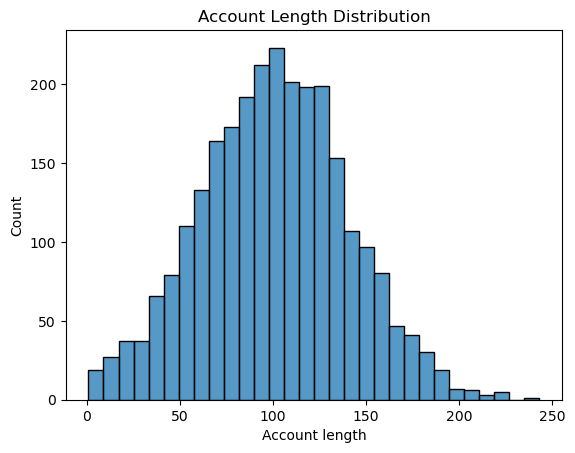

In [115]:
plt.figure()
sns.histplot(df['Account length'], bins=30)
plt.title("Account Length Distribution")
plt.show()




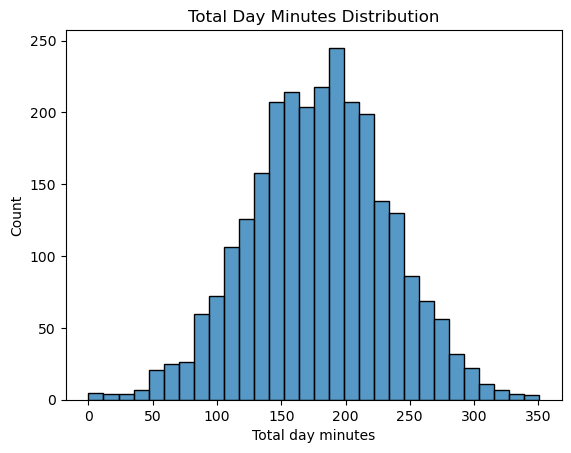

In [117]:
plt.figure()
sns.histplot(df['Total day minutes'], bins=30)
plt.title("Total Day Minutes Distribution")
plt.show()


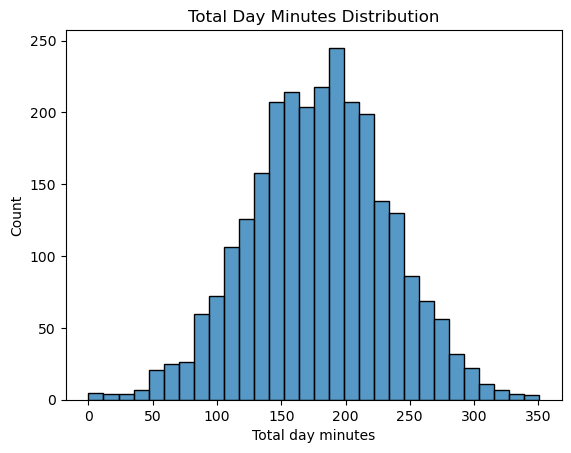

In [118]:
plt.figure()
sns.histplot(df['Total day minutes'], bins=30)
plt.title("Total Day Minutes Distribution")
plt.show()


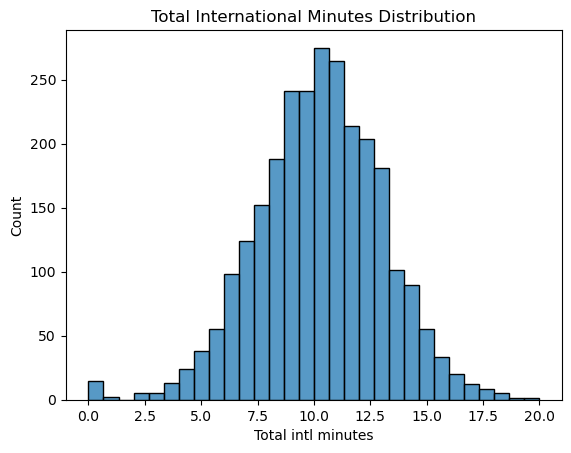

In [120]:
plt.figure()
sns.histplot(df['Total intl minutes'], bins=30)
plt.title("Total International Minutes Distribution")
plt.show()


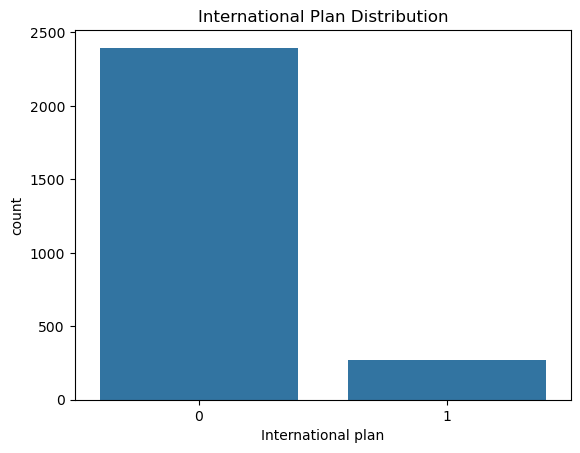

In [122]:
plt.figure()
sns.countplot(x='International plan', data=df)
plt.title("International Plan Distribution")
plt.show()


In [124]:
print(df.columns)


Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')


In [127]:
corr_features = [
    'Account length',
    'Total day minutes',
    'Total eve minutes',
    'Total night minutes',
    'Total intl minutes',
    'Customer service calls',
    'Churn'
]

corr = df[corr_features].corr()


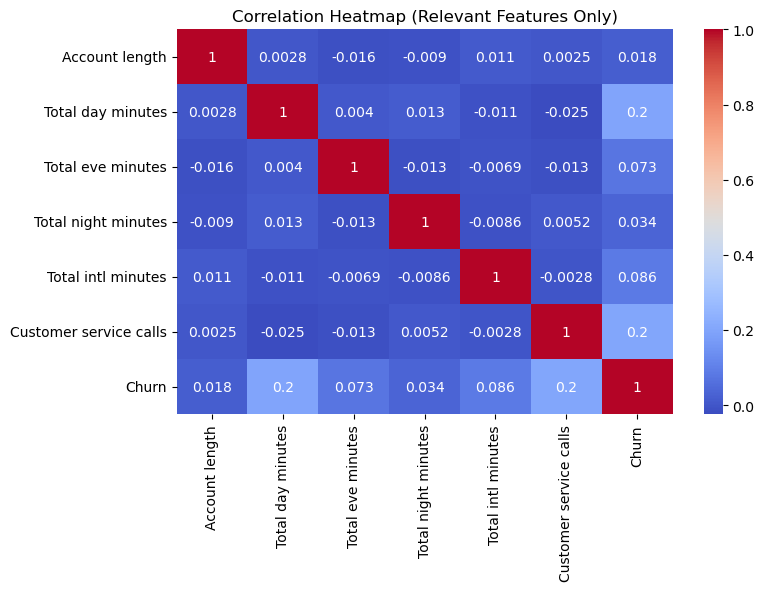

In [129]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Relevant Features Only)")
plt.show()


## Model Interpretation

While the model achieves reasonable performance, the key insights from this project
remain behavioral and business-driven:
- High customer service calls
- International plan usage
- Usage intensity patterns

These factors are more actionable for retention teams than raw predictions alone.


In [138]:
import joblib
joblib.dump(dt_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']